# 1. Load Libraries and Prepocessed Dataset
The dataset loaded is Ulcer and Healthy skin cell from dfu_features.csv

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("0_dfu_features.csv")

# 2. Describe the features

In [27]:
print("Description of new numerical dataset:")
display(df.drop(columns=["ulcer_present"]).describe())

print("\nDataset Statistics:")
display(df.groupby("ulcer_present").mean())

Description of new numerical dataset:


,area,perimeter,solidity,eccentricity,erythema_index,necrosis_index,color_variance
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,21921.705213,1615.363161,0.680102,0.821531,138.431675,135.379279,36.428126
std,10407.688548,792.588565,0.150536,0.134941,6.105316,27.914826,12.182174
min,973.000000,140.947222,0.253096,0.218060,124.860397,60.661133,11.550056
25%,14370.000000,1034.192478,0.568754,0.763561,133.751129,116.240143,28.092814
50%,20792.000000,1427.767640,0.685031,0.848042,138.698029,135.962814,35.290749
75%,27806.500000,2081.427632,0.799365,0.920384,142.441772,153.844101,44.397998
max,59071.000000,4652.131527,0.985116,0.992377,161.278900,218.491440,84.305036



Dataset Statistics:


,area,perimeter,solidity,eccentricity,erythema_index,necrosis_index,color_variance
ulcer_present,,,,,,,
0,21725.541436,1665.673860,0.710196,0.853983,138.523954,141.484293,29.043556
1,22129.746094,1562.006307,0.648186,0.787114,138.333808,128.904627,44.259807


# 3. Univariate feature distributions

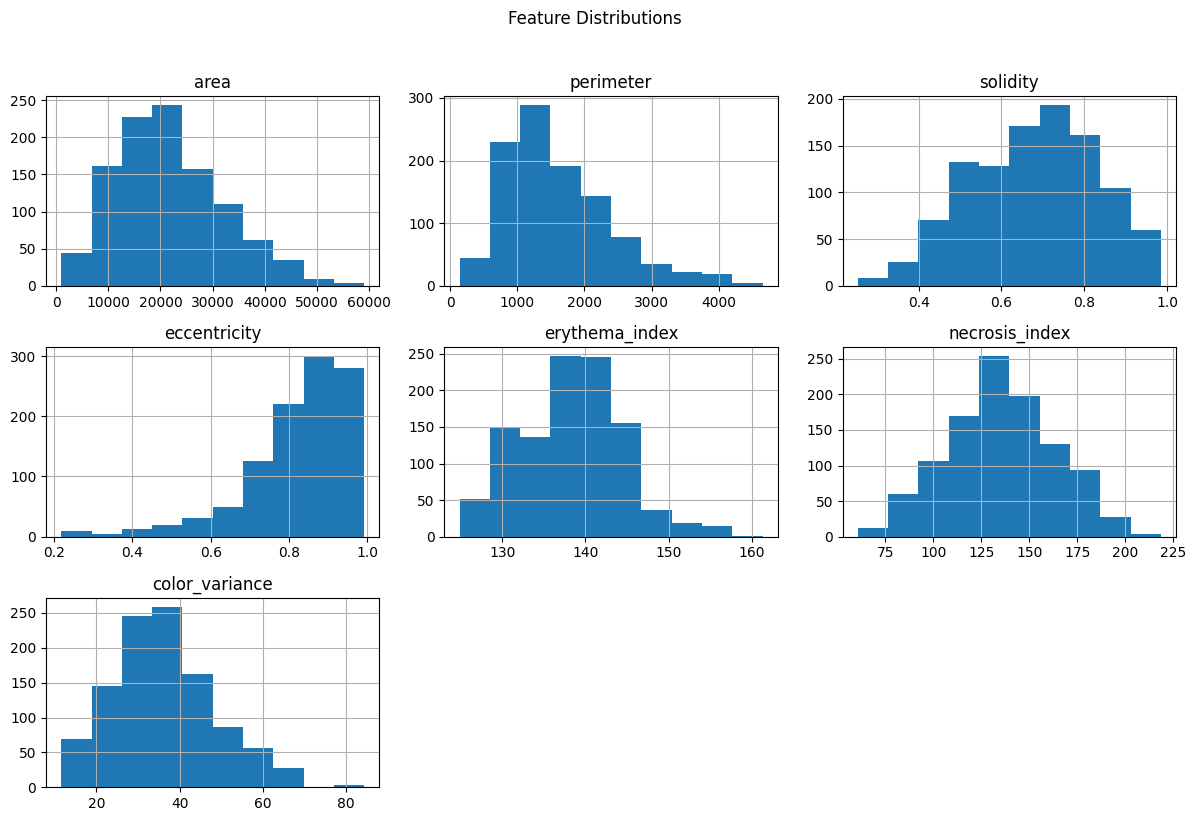

In [28]:
df.drop(columns=["ulcer_present"]).hist(figsize=(12, 8))
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

# 4. Ulcer vs Healthy comparison

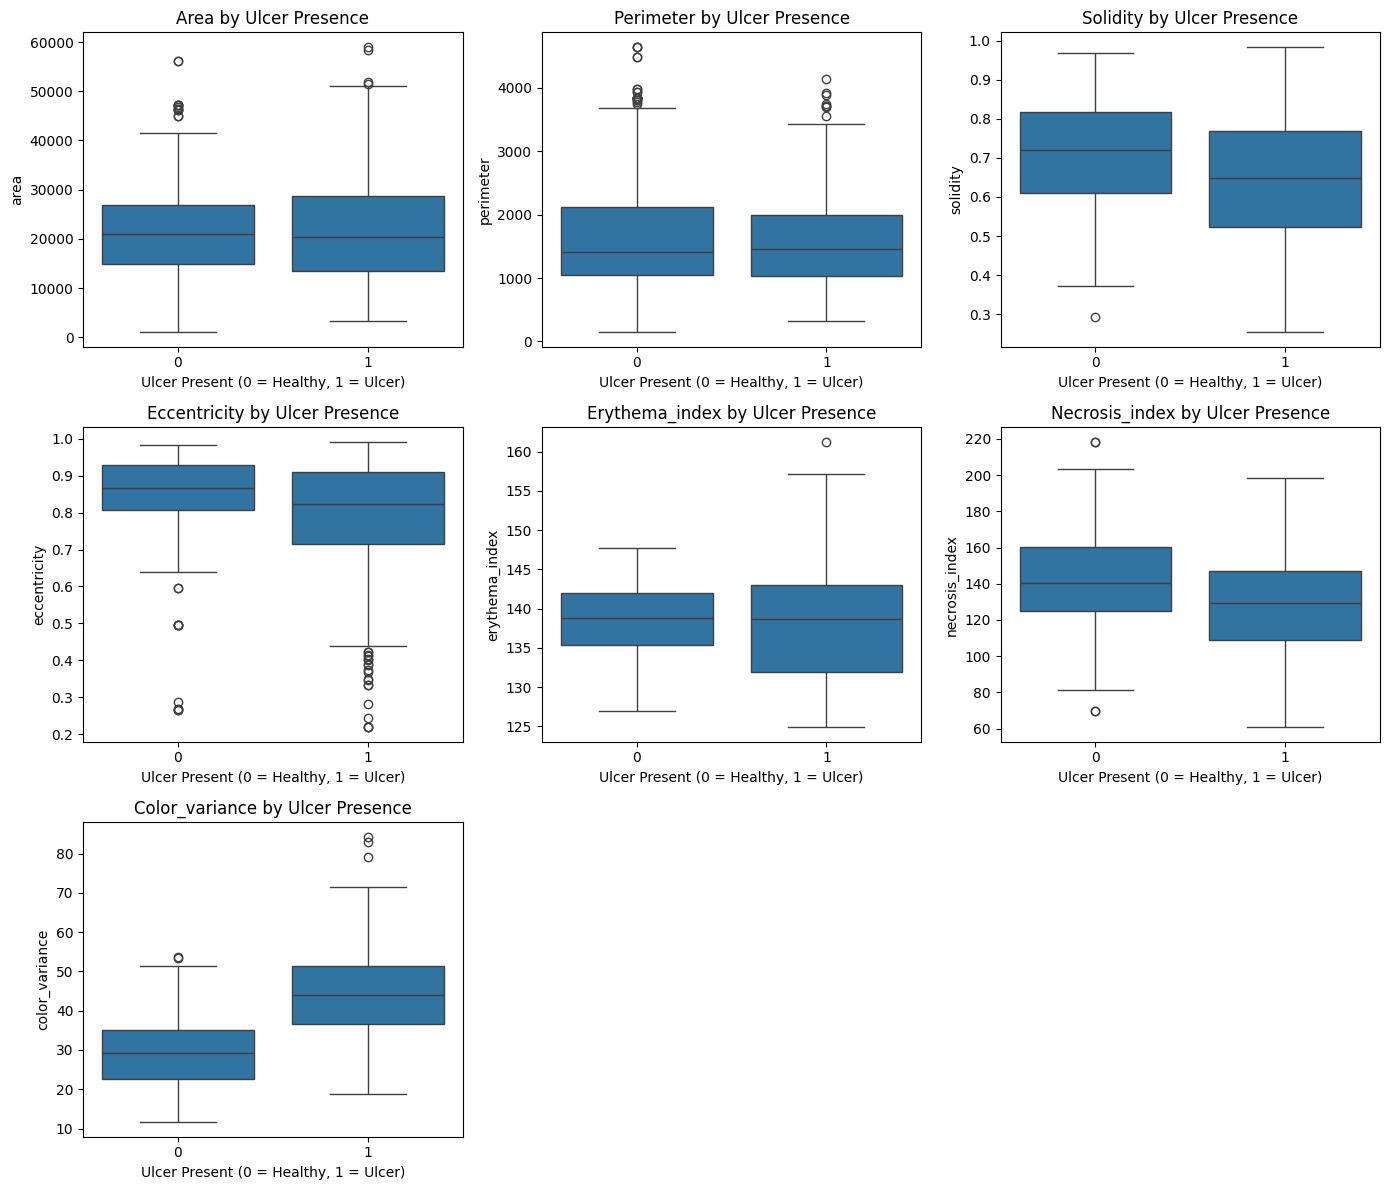

In [29]:
feature_cols = [col for col in df.columns if col != "ulcer_present"]

n_features = len(feature_cols)
n_cols = 3                       # number of plots per row
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.boxplot(
        x="ulcer_present",
        y=col,
        data=df,
        ax=axes[i]
    )
    axes[i].set_title(f"{col.capitalize()} by Ulcer Presence")
    axes[i].set_xlabel("Ulcer Present (0 = Healthy, 1 = Ulcer)")
    axes[i].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 6. Feature correlation

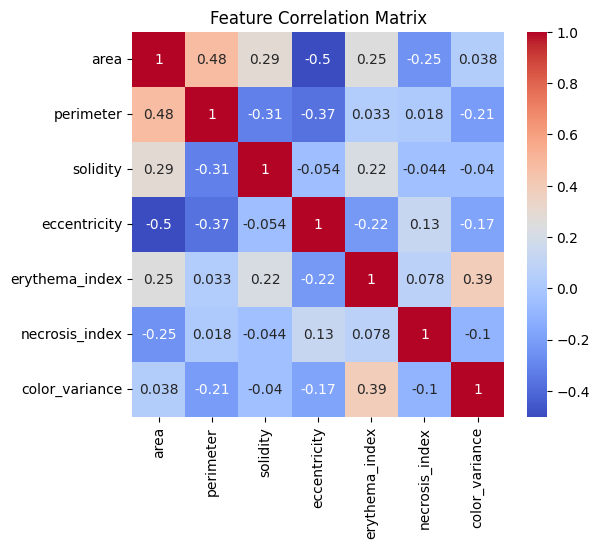

In [30]:
plt.figure(figsize=(6,5))
sns.heatmap(df.drop("ulcer_present", axis=1).corr(),
            annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()